# Project 3: Linear regression with House Prices


## Introduction:
- In this notebook we will expereiment with a dataset that is provided from kaggle about predicting the price of a home with 79 features of homes in  Ames Iowa
- The goal is to use linear regression and other techniques to predict the price of a home with the parameters a person wants
- The Link of the kaggle dataset is here : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview 


## Features
- there are 79 features in this dataset.



## prequiestist

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [31]:
# Load data from datasets
trainingDataset= pd.read_csv("train.csv")

In [32]:
# feature lokking he
trainingDataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [33]:
# print  the result if any column has null values.
print(f"\nNull values %:\n {trainingDataset.apply(lambda x: sum(x.isnull()) / len(trainingDataset))}")
 


Null values %:
 Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64


In [34]:
# calulates unknkown values for our dataset
print(f"\nUnknown Values %:\n{trainingDataset.apply(lambda x: sum(x=='Unknown') / len(trainingDataset))}")


Unknown Values %:
Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 81, dtype: float64


In [76]:
# create  a list of variables that are either  int , float64 and objects

def DataTypeDescriptions(datasets):
    s = (datasets.dtypes == 'object')
    cat_cols = list(s[s].index)
    print(f"{len(cat_cols)} Categorical features:\n{cat_cols}")


    s = (datasets.dtypes == 'float64')
    float64_cols = list(s[s].index)
    print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")

    s = (datasets.dtypes == 'int64')
    int64_cols = list(s[s].index)
    print(f"\n{len(int64_cols)} int features:\n{int64_cols}")
    #del s # auto memory nerd stuff
    

DataTypeDescriptions(trainingDataset)

43 Categorical features:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

3 float64 features:
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

35 int features:
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Firepl

In [89]:
# function for creating ranges from cat_col columns from above

#makes dummy variables , creates ranges for each column and give them numbers if their implace 

def ObjectToCategory(category_colums,dataset):
    for col in category_colums:
        dummy_cols = pd.get_dummies(dataset[col], drop_first=True, prefix=col)
        dataset = pd.concat([dataset,dummy_cols],axis=1)
        dataset.drop(columns=col, inplace=True) 

    return dataset

## Insights

- In our last cell we found that our tarining dataset contains 43 categorical features, 3 float64 features and 35 int features
- we see how well they corelate and see how imporatant they are to the prediction of the price of our homes

<AxesSubplot:>

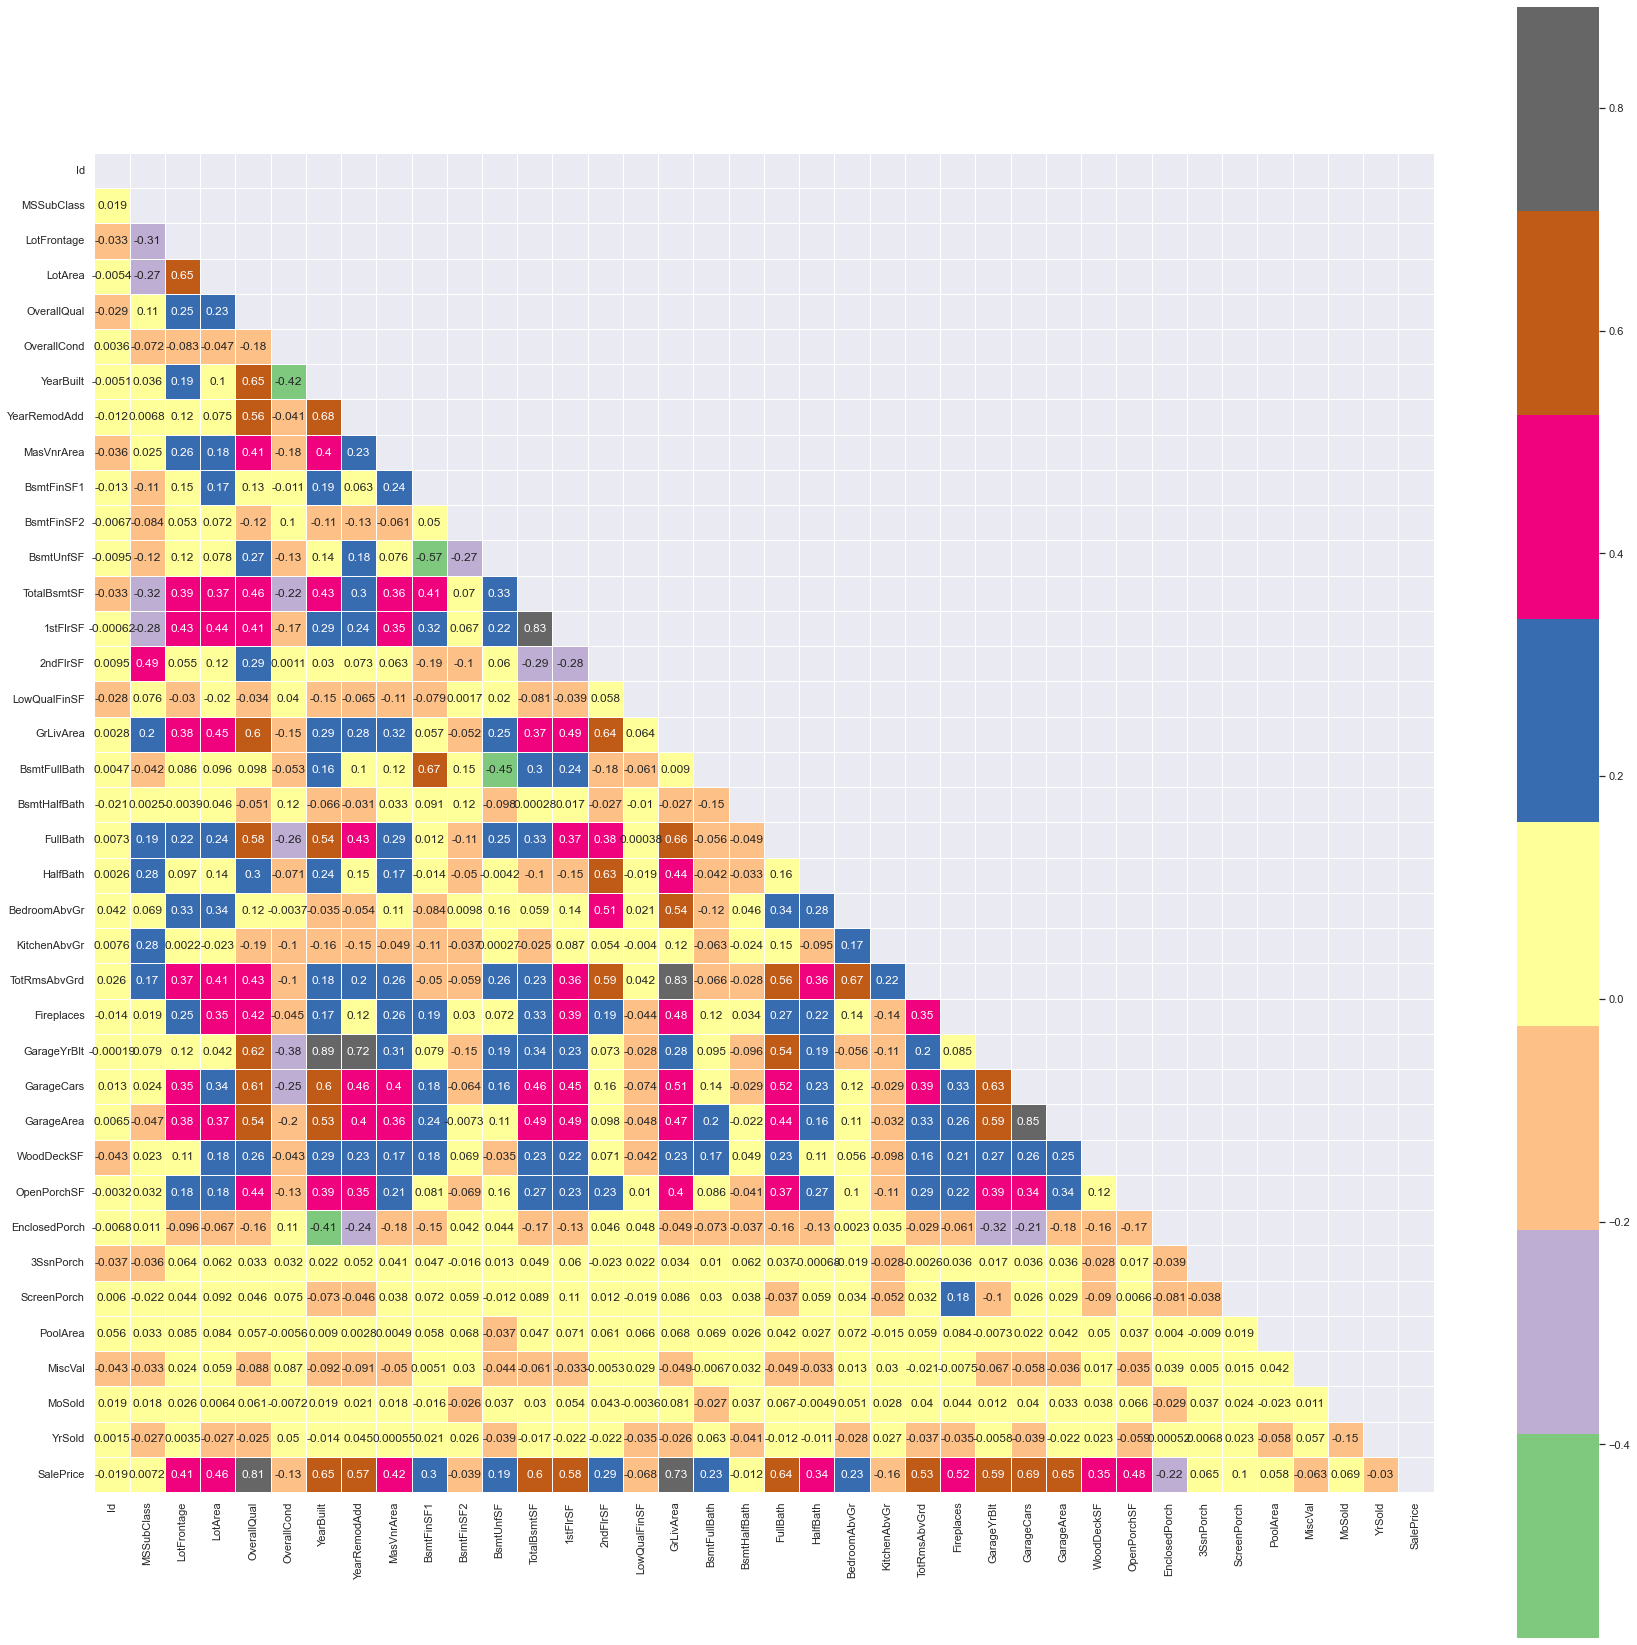

In [36]:
# We will make a corelation matrix to see how some features corelate with each other.
corelationMatrix = trainingDataset.corr(method="spearman")
mask=np.zeros_like(corelationMatrix)
mask[np.triu_indices_from(mask)] = True
sns.set(rc={'figure.figsize':(30,30)} )
#corlor maps cividis, BuPu ,cool , RdBu (best one yet), seismic (pretty too)
# muti color per section is awesome :tab20c, Accent (one of the best one yet)
sns.heatmap(corelationMatrix,annot=True,square=True,linewidths=.5,cmap="Accent",mask=mask)

## findings from the chart:
- seems that overallquality and sale price correlate very well with over 0.81 and  Good living area with 0.73 positive corelation.
-  enclosed portch and year built coerlate negatively at 0.41, could be an intresting thing to explore.
- garage area correlates with garage year built postive
- year built and garage year buit postive at 0.89
- garageyearbuilt corelates with year remod add with 0.72 
- total living area corelates with total roms above grd and kitchen above ground with 0.67
- BSMunsf is negatively corerelate with bsmunitsf with -0.45
- 1stflrsf correlates with totalbsmsf with 0.83 
- BSMunfsf corelatees negatively with bsmfirst2 -0.57
- yearbuilt corelates negative  with overall condition with -0.42
- we can get rid of id it useless 


## Muti Linear Regression:
- Since our dataset is so big we need to get rid a few( or more) preidctors (variables/features) to make our model cleaner and eaiser to handle.
-  our response will be our (price of home)
- our predictors (xi) will be our variables we use for our prediction of price.


In [69]:
# Muti linear regression model:
from sklearn.linear_model import LinearRegression

#need to merge sample_submisson datasets with our own, this kinda creates a problem of extreme imbalance but lets findout
pricePrdictionDataset=pd.read_csv("sample_submission.csv")
testDataset=pd.read_csv("test.csv")



mergedDataset=pd.concat([testDataset,pricePrdictionDataset],axis=1)




In [70]:
# showing the head of the merged dataset
mergedDataset.head()
# mergedDataset.iloc[0]
mergedDataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
YrSold             int64
SaleType          object
SaleCondition     object
Id                 int64
SalePrice        float64
Length: 82, dtype: object

In [71]:
# removing id tags from  datasets
noIDMergedDataset=mergedDataset.drop(['Id'],axis=1)
noIDMergedDataset.head()
noIDMergedDataset.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 80, dtype: object

In [77]:
# need to convert objects to categories
DataTypeDescriptions(noIDMergedDataset)

43 Categorical features:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

12 float64 features:
['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']

25 int features:
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Ki

In [90]:
# object conversion
cat_cols2=list(noIDMergedDataset.select_dtypes("object"))
cleanerDataset=ObjectToCategory(cat_cols2,noIDMergedDataset)

In [94]:
#look at the new dataset
cleanerDataset.dtypes

MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
OverallQual                int64
OverallCond                int64
                          ...   
SaleCondition_AdjLand      uint8
SaleCondition_Alloca       uint8
SaleCondition_Family       uint8
SaleCondition_Normal       uint8
SaleCondition_Partial      uint8
Length: 228, dtype: object

In [ ]:
#noramlizing the data
from sklearn.preprocessing import MinMaxScaler
req_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
            'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
            'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
            'Avg_Utilization_Ratio']

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train[req_cols])

X_test = scaler.transform(X_test[req_cols])

In [93]:
# Muti Linear regression
YResponse =cleanerDataset["SalePrice"]
xPredictor=cleanerDataset
# works
#xPredictor.dtypes 

mutiReg=LinearRegression().fit(xPredictor,YResponse)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').